# CSCI4022 Homework 7; Decompositions

## Due Friday, April 23 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | 

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import networkx as nx

C:\Users\zacha\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (7 pts; Theory: PCA)
Prove that if $M$ is any matrix, then $M^TM$ and $MM^T$ are symmetric.

***
<a/ id='p3'></a>
[Back to top](#top)
# Problem 3 (15 pts; Practice: SVD)


Below is the matrix M.  It has rank 3, as you can see by observing that the first column plus the third column minus twice the second column equals 0.


$M=\begin{bmatrix}
1 &2 &3 &1\\
3 &4 &5 &2\\
5 &4 &3 &2\\
0 &2 &4 &4\\
1 &3 &5 &3\\
5 &5 &5 &4\\
3 &4 &5 &3\\
\end{bmatrix}$


In [2]:
M= np.matrix([[1,2,3,1],
             [3,4,5,2],
             [5,4,3,2],
             [0,2,4,4],
             [1,3,5,3],
             [5,5,5,4],
             [3,4,5,3]])

### Part  1:
Compute the matrices $M^TM$ and $MM^T$.


### Part 2:
Find the eigenvalues and eigenvectors for your matrices of part 1.

In [3]:
#YOUR CODE HERE

### Part 3:
Find the SVD for the original matrix $M$ from the objects in part B. Note that there are only two nonzero eigenvalues, so your matrix $\Sigma$ should have only two singular values, while $U$ and $V$ have only two columns.

In [4]:
#YOUR CODE HERE

### Part 4:

Set your smaller singular value to 0 and compute the SVD rank 1 approximation to the matrix M.  How much of the energy of the original singular values is retained by the one-dimensional approximation?

***
<a/ id='p3'></a>
[Back to top](#top)
# Problem 3 (15 pts; Practice, UV)

Consider the same M as above;




$M=\begin{bmatrix}
1 &2 &3 &1\\
3 &4 &5 &2\\
5 &4 &3 &2\\
0 &2 &4 &4\\
1 &3 &5 &3\\
5 &5 &5 &4\\
3 &4 &5 &3\\
\end{bmatrix}$

### Part 1:
Find the rank-1 U-V decomposition ($5 \times 1$ times $1 \times 3$) of M, using the Frobenius norm.  Initialize with all 1's, and for simplicity you may update the U and V entries in order if you wish.

### Part 2:

Use the decomposition above to "predict" the entry in column 1, row 4, where M holds a zero (i.e. report the entry of the $P=UV$ matrix).

In [5]:
Mn= np.matrix([[1,2,3,1],
             [3,4,5,2],
             [5,4,3,2],
             [np.nan,2,4,4],
             [1,3,5,3],
             [5,5,5,4],
             [3,4,5,3]])

### Part 3:
How does your decomposition vary from the one in Problem 2, part 4?  Does this make sense?


***
<a/ id='p4'></a>
[Back to top](#top)
# Problem 4 (Practice: PCA/SVD and Data; 8 pts) 


In homework 3, we use k-means to cluster the data from the mtcars data set below.  We're going to repeat that analysis, but now use PCA to get a better final **visualization** of the data.

                mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
Mazda RX4      21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
Datsun 710     22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1


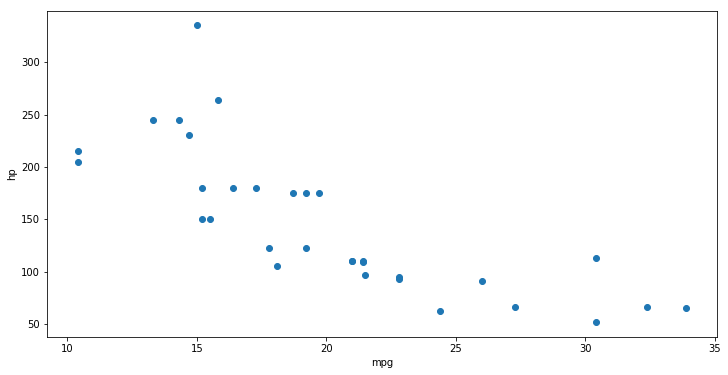

In [6]:
cars= sm.datasets.get_rdataset('mtcars').data
print(cars.head(3))

#example plot of mpg x hp
fig, ax= plt.subplots(figsize=(12,6))
plt.scatter(cars['mpg'], cars['hp'])
ax.set_xlabel('mpg')
ax.set_ylabel('hp');

#We're going to attempt to cluster this data using **4** of these columns: mpg, disp, wt, and qsec.

### Part 1: Cluster

Use k-means with k=3 (random initialization, only once to convergence) to find clusters for the data set.  Use the mpg, disp, wt, and qsec columns, but as in HW 3 replacing each with their standard normalization (for each column, subtract the mean of that column then divide by its standard deviation).

You may use your old HW code or solutions/notebook code, here.

### Part 2: PCA

Get the eigendecomposition of either $M^TM$ or $MM^T$, and use it to construct a decomposition of the given data matrix.  Then, rotate the data into it's $k=2$ lower dimensional representation according to PCA.  Then create a scatter plot of the data where the x-axis is the primary (largest) component/eigenvector and the y-axis is the second largest.  Color the observations according to their clusters in part 1.  Do the colorings appear more consistent with the picture than they did in HW3?